In [30]:
!pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import psycopg2
with psycopg2.connect(host="localhost", user="postgres", password="1", dbname="medical_db", port=5432) as conn:
    with conn.cursor() as cur:
        cur.execute("SELECT * FROM Hospital_Facility")
        records = cur.fetchall()
records

[(1,
  'City General Hospital',
  'General',
  250,
  datetime.date(1985, 5, 15),
  '123 Main Street'),
 (2,
  "Children's Medical Center",
  'Pediatric',
  150,
  datetime.date(1992, 11, 20),
  '456 Elm Avenue'),
 (4,
  'Northwest Psychiatric',
  'Psychiatric',
  80,
  datetime.date(1978, 9, 30),
  '321 Pine Road'),
 (5,
  'Riverside Clinic',
  'Outpatient',
  0,
  datetime.date(2010, 7, 12),
  '654 Maple Lane'),
 (3,
  'Central Trauma Unit',
  'Trauma',
  140,
  datetime.date(2001, 3, 8),
  '789 Oak Boulevard')]

In [17]:
import psycopg2
import csv

In [ ]:
# Экспорт данных из базы данных SQL в файлы, чтобы получить информацию о больнице с ID=4.
import psycopg2
import csv

conn_params = {
    "host": "localhost",  
    "database": "medical_db",
    "user": "postgres",
    "password": "1",
    "port": "5432"           
}

query = """
SELECT * FROM Hospital_Facility WHERE Facility_Id = 4;
"""

output_file = "hospital_facility_4.csv" 
try:
   
    conn = psycopg2.connect(**conn_params)
    cursor = conn.cursor()
    
    cursor.execute(query)
    result = cursor.fetchall()
    
    column_names = [desc[0] for desc in cursor.description]
    
    with open(output_file, mode='w', newline='', encoding='utf-8-sig') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(column_names)  
        writer.writerows(result)       
    
    print(f"Данные успешно экспортированы в файл: {output_file}")

except Exception as e:
    print(f"Ошибка: {e}")

Данные успешно экспортированы в файл: hospital_facility_4.csv


In [ ]:
# Индивидуальные задания. Вариант 20


# 1) Создайте таблицу "Hospital_Facility" с полями "ID", "NAME", "TYPE".
CREATE TABLE Hospital_Facility (
    Facility_Id serial NOT NULL PRIMARY KEY,
    Facility_Name VARCHAR(100) NOT NULL,
    Facility_Type VARCHAR(50) NOT NULL,
    Bed_Count INTEGER DEFAULT 0,
    Established_Date DATE,
    Address VARCHAR(200)
);

# 2) Вставьте 5 записей о больничных объектах
INSERT INTO Hospital_Facility (Facility_Id, Facility_Name, Facility_Type, Bed_Count, Established_Date, Address)
VALUES
(1, 'City General Hospital', 'General', 250, '1985-05-15', '123 Main Street'),
(2, 'Children''s Medical Center', 'Pediatric', 150, '1992-11-20', '456 Elm Avenue'),
(3, 'Central Trauma Unit', 'Trauma', 120, '2001-03-08', '789 Oak Boulevard'),
(4, 'Northwest Psychiatric', 'Psychiatric', 80, '1978-09-30', '321 Pine Road'),
(5, 'Riverside Clinic', 'Outpatient', 0, '2010-07-12', '654 Maple Lane');

# 3) Получите информацию о больнице с ID=4

SELECT * FROM Hospital_Facility WHERE Facility_Id = 4;

# 4) Обновите количество коек в больнице с ID=3

UPDATE Hospital_Facility 
SET Bed_Count = 140 
WHERE Facility_Id = 3;

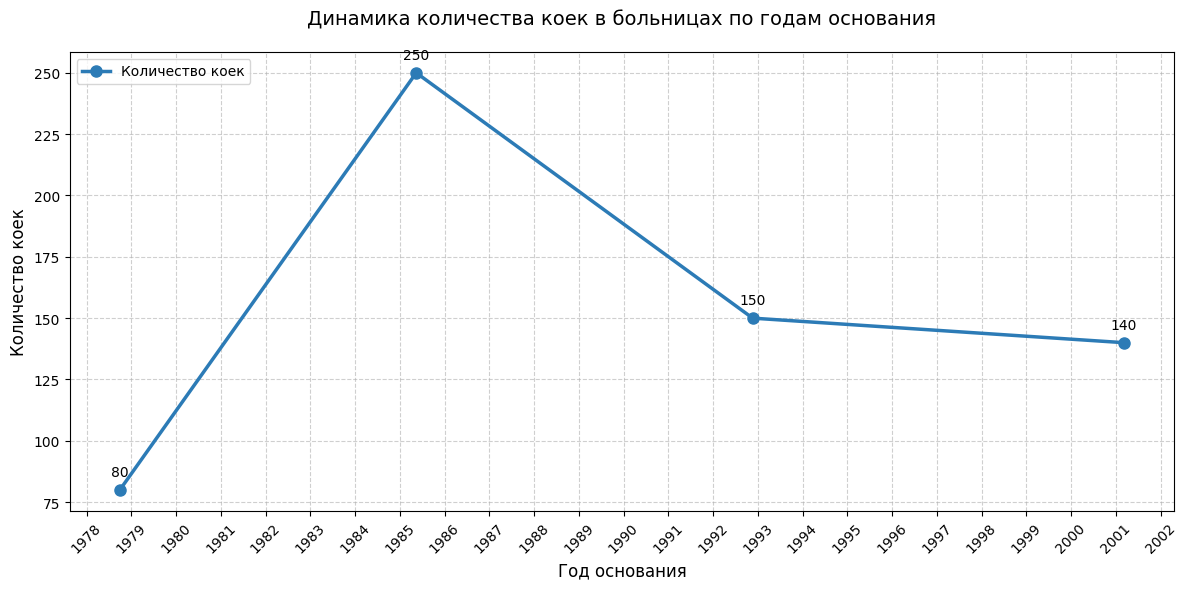

График успешно сохранен как 'hospital_beds_trend.png'


In [24]:
# 5) Создайте линейный график для отображения трендов по количеству коек в больницах
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Параметры подключения к PostgreSQL
conn_params = {
    "host": "localhost",  
    "database": "medical_db",
    "user": "postgres",
    "password": "1",
    "port": "5432" 
}

query = """
SELECT 
    Established_Date,
    SUM(Bed_Count) AS total_beds
FROM 
    Hospital_Facility
WHERE
    Bed_Count > 0 
GROUP BY 
    Established_Date
ORDER BY 
    Established_Date;
"""

try:

    conn = psycopg2.connect(**conn_params)
    cursor = conn.cursor()
    
    cursor.execute(query)
    data = cursor.fetchall()
    
    dates = [row[0] for row in data]
    beds = [row[1] for row in data]
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(dates, beds, marker='o', linestyle='-', color='#2c7bb6', 
             linewidth=2.5, markersize=8, label='Количество коек')
    
    plt.title('Динамика количества коек в больницах по годам основания', 
              fontsize=14, pad=20)
    plt.xlabel('Год основания', fontsize=12)
    plt.ylabel('Количество коек', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    
    for date, bed in zip(dates, beds):
        plt.annotate(f'{bed}', xy=(date, bed), xytext=(0, 10),
                     textcoords='offset points', ha='center', fontsize=10)
    
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    
    plt.savefig('hospital_beds_trend.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("График успешно сохранен как 'hospital_beds_trend.png'")

except Exception as e:
    print(f"Ошибка: {e}")

finally:
    if 'conn' in locals():
        cursor.close()
        conn.close()